# Atividade 3 - Correlações
Investigação dos efeitos de concussões relacionadas ao esporte.
Os dados são baseados na ferramenta de avaliação [IMPACT](http://www.impacttest.com).

A ferramenta IMPACT tem seis métricas primárias, sendo elas:
- Composto de Memória Verbal
- Composto de Memória Visual
- Composto de Velocidade visual motora
- Tempo de Reação
- Composto de Controle de Impulso
- Nota total do sintoma

## Objetivos Gerais:
1. Extrair estatísticas descritivas.
2. Conduzir análises de correlação.
3. Examinar a relação entre variáveis utilizando graficos de dispersão.


## Objetivos Específicos:
1. Importe a base de dados impact.csv
 
2. Visualize as estatísticas descritivas:<br>
	2.1 Plote o histograma das seis métricas:<br>
	2.2 Com base nos histogramas, responda:<br>
		2.2.1 Qual é a média da primeira e da segunda medição de memória verbal? (vermem1 e vermem2). <br>
		2.2.2 Qual é o desvio padrão da primeira e da segunda medição de memória visual? (vismem1 e vismem2). <br>
		2.2.3 Qual é a média de erro padrão da primeira e da segunda medição de velocidade visual motora (vms1 e vms2)<br>
		2.2.4 Quantas medições compõem a amostra?<br>


3. Analise de correlação das medidas de base (baseline):<br>
	3.1 Crie a tabela de correlações das variáveis de base (Analyze > Multivariate Method > Multivariate). selecione as seis métricas, nas duas medidas, (colunas 3 a 8) e adicione em "Y". Clique OK.<br>
		3.1.1 A Primeira medição de Memória Visual tem correlação negativa com qual variável?<br>
		3.1.2 Qual a Correlação entre a primeira e segunda medição de Memória Visual?<br>
		3.1.3 Liste as métricas que tem correlação positiva superior a 0.3<br>
		3.1.4 Liste as métricas qeu tem correlação negativa superior à -0.3<br>

4. Analise a correlação de todas as métricas por grupo (controle / concussão):<br>
	4.1 Crie as tabelas de correlações das variáveis em função do grupo: (Analyze > Multivariate Method > Multivariate). Selecione as seis métricas, nas duas medidas, (colunas 3 a 8) e adicione em "Y". Selecione 'condition' e adicione em 'by'. Clique OK.<br>
		4.1.1 Qual a diferença de correlação entre Memória Verbal 1 e Memória Verbal 2 entre grupos?<br>
		4.1.2 Qual a diferença de correlação entre Memória Verbal 1 e Memória Visual 2 entre grupos?<br>

5. A métrica 'controle de impulso' pode prever perda de memória após concussão? Responda e inclua o valor de correlação encontrado.<br>
	5.1 Criar o valor final das métricas Memória Visual e Memória Verbal ('valor 1'- 'valor 2') e atribuir a uma nova coluna. Nomear as colunas como 'Visual Impair' e 'Verbal Impair'. Na tabela de dados, à esquerda (Columns > New Columns > Column Properties > Formula)<br>
	5.2 Criar a Média simples entre os escores de 'Visual Impair' e 'Verbal Impair' (soma das colunas / 2). Nomear a coluna resultante como 'Memory Impair'<br>
	5.3 Traçar a correlação entre Controle de Impulso (IC) e Memory Impair.<br>
	5.4 Qual a correlação? <br>

6. Gráficos de dispersão:<br>
Juntamente com a matrix de correlações, o JMP oferece também a matriz de gráficos de dispersão.<br>
Na seta vermelha a esquerda, habilite:<br>
6.1 - Fit line: traça a linha média de cada gráfico, assim como a mancha de confiança.<br>
6.2 - Density Ellipses: mostra a elipse que engloba a maior parte de dados (padrão 90%, mas é possível ajustar no menu).<br>
6.3 - Explore as configurações disponíveis na seta vermelha (recomendação: matrix options > significance circles)<br>

6.4 Crie um gráfico de dispersão da relação entre 'Memória Verbal 1' e 'Memória Visual 1'. (Fit Y by X)<br>
	6.4.1 Habilite a linha de ajuste do modelo linear (Linear Fit). - Salve e submeta o gráfico de dispersão.<br>

Mais informações:
https://community.jmp.com/t5/Short-Videos/Assessing-Correlations/ta-p/271928

In [ ]:
# Importar bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Ler base de dados (atualize o caminho para a pasta do seu drive, basta clicar com o botão direito e acionar o botão 'copiar caminho')
impact = pd.read_csv('../data/impact.csv')

In [6]:
# Informação geral e tipos de dados
impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subject                      40 non-null     int64  
 1   condition                    40 non-null     object 
 2   verbal_memory_baseline       40 non-null     int64  
 3   visual_memory_baseline       40 non-null     int64  
 4   visual-motor_speed_baseline  40 non-null     float64
 5   reaction_time_baseline       40 non-null     float64
 6   impulse_control_baseline     40 non-null     int64  
 7   total_symptom_baseline       40 non-null     int64  
 8   verbal_memory_retest         40 non-null     int64  
 9   visual_memory_retest         40 non-null     int64  
 10  visual-motor_speed_retest    40 non-null     float64
 11  reaction_time_retest         40 non-null     float64
 12  impulse_control_retest       40 non-null     int64  
 13  total_symptom_retest  

In [13]:
impact.describe()

,subject,verbal_memory_baseline,visual_memory_baseline,visual-motor_speed_baseline,reaction_time_baseline,impulse_control_baseline,total_symptom_baseline,verbal_memory_retest,visual_memory_retest,visual-motor_speed_retest,reaction_time_retest,impulse_control_retest,total_symptom_retest
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,89.750000,74.875000,34.027250,0.667000,8.275000,0.050000,82.000000,71.900000,35.833750,0.673000,6.750000,13.875000
std,11.690452,6.444039,8.599903,3.904565,0.150779,2.050485,0.220721,11.022122,8.424019,8.664461,0.218552,2.976403,15.320821
min,1.000000,75.000000,59.000000,26.290000,0.420000,2.000000,0.000000,59.000000,54.000000,20.150000,0.190000,1.000000,0.000000
25%,10.750000,85.000000,68.750000,31.590000,0.567500,7.000000,0.000000,74.000000,66.750000,30.330000,0.557500,5.000000,0.000000
50%,20.500000,91.000000,75.000000,33.500000,0.650000,8.500000,0.000000,85.000000,72.000000,35.150000,0.650000,7.000000,7.000000
75%,30.250000,95.000000,81.250000,36.437500,0.732500,10.000000,0.000000,91.000000,79.000000,39.405000,0.732500,9.000000,27.000000
max,40.000000,98.000000,91.000000,41.870000,1.200000,12.000000,1.000000,97.000000,86.000000,60.770000,1.300000,12.000000,43.000000


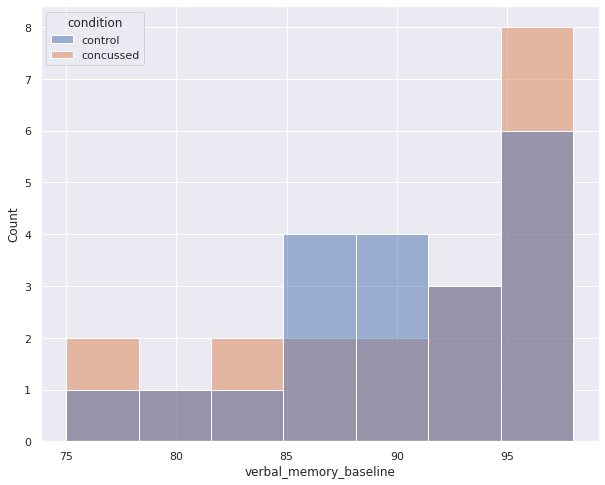

In [7]:
# Plotar histograma "Memória Verbal"
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
sns.histplot(data=impact, x ='verbal_memory_baseline', hue='condition')
plt.show()

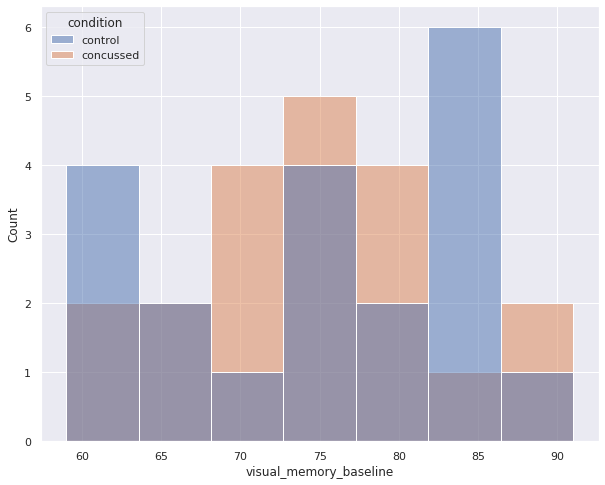

In [8]:
# Plotar histograma "Memória Visual"
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
sns.histplot(data=impact, x ='visual_memory_baseline', hue='condition')
plt.show()

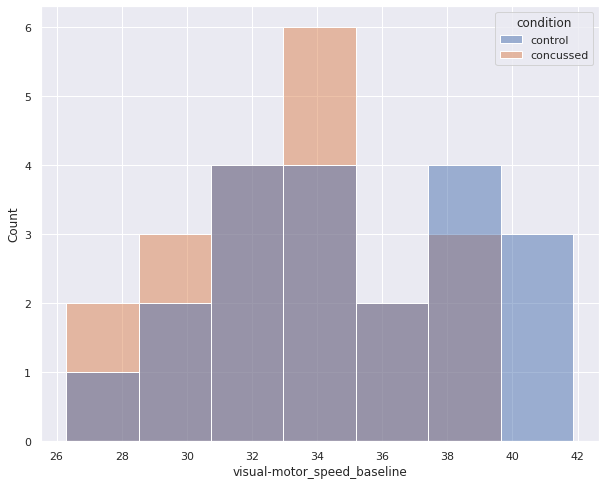

In [9]:
# Plotar histograma "Velocidade Visual Motora"
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
sns.histplot(data=impact, x ='visual-motor_speed_baseline', hue='condition')
plt.show()

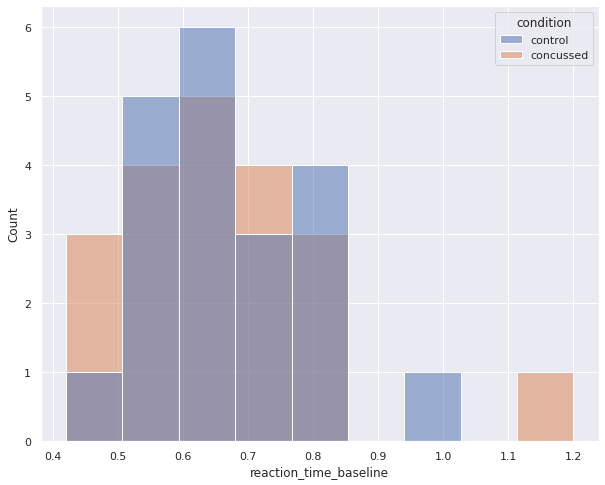

In [10]:
# Plotar histograma "Tempo de Reação"
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
sns.histplot(data=impact, x ='reaction_time_baseline', hue='condition')
plt.show()

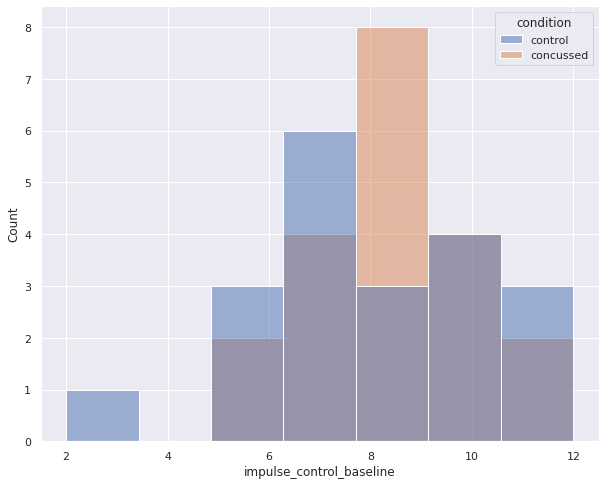

In [11]:
# Plotar histograma "Controle de Impulso"
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
sns.histplot(data=impact, x ='impulse_control_baseline', hue='condition')
plt.show()

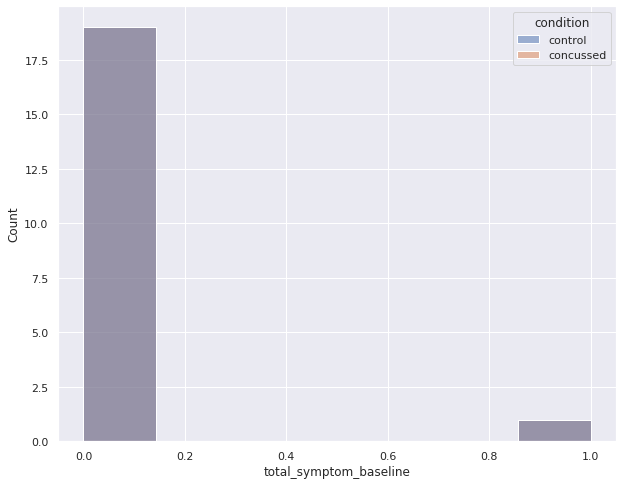

In [12]:
# Plotar histograma "Nota Total do Sintoma"
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
sns.histplot(data=impact, x ='total_symptom_baseline', hue='condition')
plt.show()

In [23]:
pd.set_option('display.precision', 2)

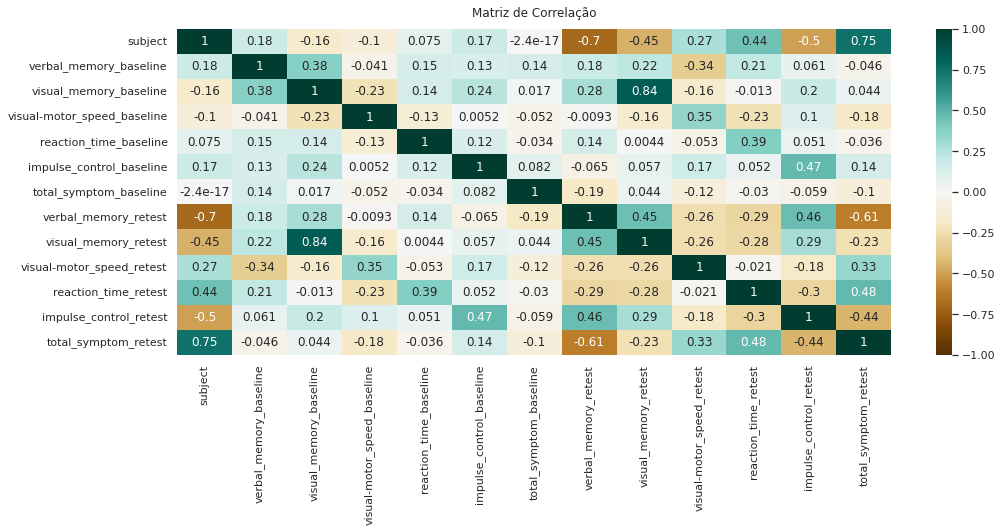

In [32]:
# Matriz de correlação
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(impact.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Matriz de Correlação', fontdict={'fontsize':12}, pad=12)
plt.show()

/tmp/ipykernel_32305/3955557753.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(impact.corr(), dtype=np.bool))


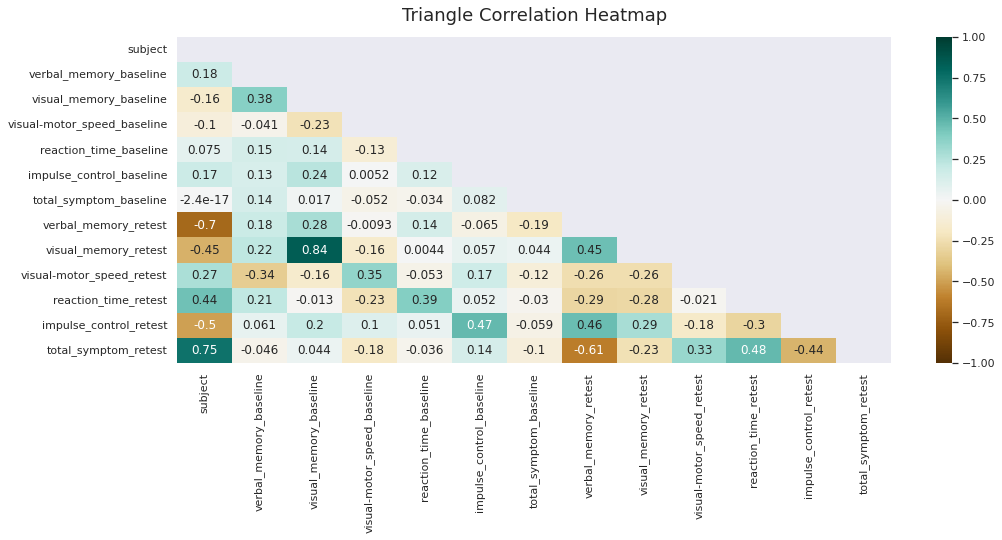

In [34]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(impact.corr(), dtype=np.bool))
heatmap = sns.heatmap(impact.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

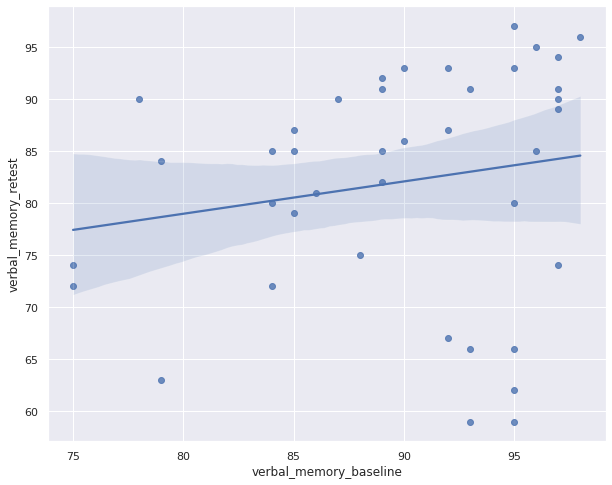

In [36]:
# Plotar gráfico de dispersão
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
sns.regplot(data = impact, x='verbal_memory_baseline', y='verbal_memory_retest')
plt.show()